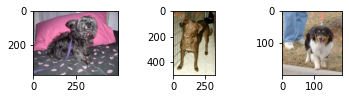

In [9]:
from matplotlib import pyplot as plt
from matplotlib.image import imread

folder = 'C:/Users/Luis/Cats_Dogs/dogscats/train/dogs/'

try:
    for i in range(3):
        # Defining subplot
        plt.subplot(330 + 1 + i)
        # Defining filename
        filename = folder + 'dog.' + str(i) + '.jpg'
        # load image pixels
        image = imread(filename)
        # ploting pixel data
        plt.imshow(image)
        continue
except FileNotFoundError:
    pass

# show the figure
plt.show()

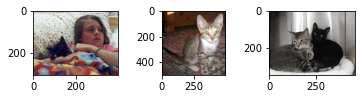

In [10]:
from matplotlib import pyplot as plt
from matplotlib.image import imread

folder = 'C:/Users/Luis/Cats_Dogs/dogscats/train/cats/'

for i in range(6,9):
    # Defining subplot
    plt.subplot(330 + 1 + i)
    # Defining filename
    filename = folder + 'cat.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # ploting pixel data
    plt.imshow(image)
folder = 'C:/Users/Luis/Cats_Dogs/dogscats/train/'
# show the figure
plt.show()

In [ ]:
# load dogs vs cats dataset, reshape and save to a new file
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# define location of dataset
folder = 'C:/Users/Luis/Cats_Dogs/dogscats/test1/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
    # determine class
    output = 0.0
    if file.startswith('cat'):
        output = 1.0
    # load image
    photo = load_img(folder + file, target_size=(200, 200))
    # convert to numpy array
    photo = img_to_array(photo)
    # store
    photos.append(photo)
    labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('dogs_vs_cats_photos.npy', photos)
save('dogs_vs_cats_labels.npy', labels)


In [ ]:
# Move the above folder path to somewhere else to maybe not get the stupid Permissions Error

In [ ]:
from numpy import load
photos = load('dogs_vs_cats_photos.npy')
labels = load('dogs_vs_cats_labels.npy')
print(photos.shape, labels.shape)

In [ ]:
# create directories
from os import makedirs
dataset_home = r'C:\Users\Luis\Cats_Dogs\dogscats'
subdirs = ['train/', 'valid/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)

In [ ]:
from random import seed
from random import random
from shutil import copyfile
from shutil import copyfileobj, copy, copy2
import shutil
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = r'C:/Users/Luis/Cats_Dogs/dogscats/train/dogs/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'valid/'
    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/'  + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/'  + file
        copyfile(src, dst)


In [ ]:
type(dst_dir)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard
from keras.layers import Dropout
import time
from keras.optimizers import SGD

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# define model
model = define_model()

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
#create data generator
# import tensorflow as tf

# tf.keras.preprocessing.image.ImageDataGenerator(
#     featurewise_center=False,
#     samplewise_center=False,
#     featurewise_std_normalization=False,
#     samplewise_std_normalization=False,
#     zca_whitening=False,
#     zca_epsilon=1e-06,
#     rotation_range=0,
#     width_shift_range=0.0,
#     height_shift_range=0.0,
#     brightness_range=None,
#     shear_range=0.0,
#     zoom_range=0.0,
#     channel_shift_range=0.0,
#     fill_mode="nearest",
#     cval=0.0,
#     horizontal_flip=False,
#     vertical_flip=False,
#     rescale=None,
#     preprocessing_function=None,
#     data_format=None,
#     validation_split=0.00,
#     dtype=None,
    
# )

# print(type(ImageDataGenerator))


In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
# prepare iterators
train_it = datagen.flow_from_directory(r'C:\Users\Luis\Cats_Dogs\dogscatstrain',
    class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory(r'C:\Users\Luis\Cats_Dogs\dogscatsvalid',
    class_mode='binary', batch_size=64, target_size=(200, 200))

In [ ]:
import keras
# fit model
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)

In [ ]:
# evaluate model
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='valid')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='valid')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()


In [ ]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
    # 3 Block CNN
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='valid')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='valid')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory(r'C:\Users\Luis\Cats_Dogs\dogscatstrain',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    test_it = datagen.flow_from_directory(r'C:\Users\Luis\Cats_Dogs\dogscatsvalid',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

In [ ]:
# Using a Model that Keras has built in 
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator


# define cnn model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='valid')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='valid')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()
    
    
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(r'C:\Users\Luis\Cats_Dogs\dogscatstrain',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    test_it = datagen.flow_from_directory(r'C:\Users\Luis\Cats_Dogs\dogscatsvalid',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
 
    # entry point, run the test harness
run_test_harness()


In [ ]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator


# define cnn model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

        
# run the test harness for evaluating a model
def run_test_harness():
# define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(r'C:\Users\Luis\Cats_Dogs\dogscatstrain',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    model.fit(train_it, steps_per_epoch=len(train_it), epochs=5, verbose=1)
    # save model
    model.save('final_model.h5')
    # entry point, run the test harness
run_test_harness()

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
    # load the image
    img = load_image('TestCat1.jpg') # Can do jpg/jfif/
    # load model
    model = load_model('final_model.h5')
    # predict the class
    result = model.predict(img)
    if result >= 0.90:
        result[0] = 1
    elif result <= 0.90:
        result[0] = 0
    print(result[0])
    plt.imshow(img[0]) # I added to be able to show image being predicted
    plt.show()
    if result == 1:
         print("Dog")
    elif result == 0:
         print("Cat")

# entry point, run the example
run_example()

# With the model is 0 for cat and 1 for a Dog or the closer to 1 its a dog and 0 and below are closer to cats


In [1]:
# Model making prediction from the webcam 

import cv2
from PIL import Image
from keras import models
import numpy as np
import time

model = models.load_model('final_model.h5')
video = cv2.VideoCapture(0)

while True:
    _, frame = video.read()
    
    # Converting captured frame to RGB
    img = Image.fromarray(frame, 'RGB')
    # Resizing image because those are the dimensions in which the model trained on
    img = img.resize((224,224))
    img_array = np.array(img)
    
    img_array = np.expand_dims(img_array, axis=0)
    
    # Calling the prediction that the model is making
    prediction = (model.predict(img_array)[0][0])
    score = np.amax(prediction)
    score = '{:6f}'.format(score)

    #time.sleep(0.15)
    #print(prediction)
    
    if prediction >= 0.90:
        prediction = 'DOG'
        #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #time.sleep(0.15)
        #print(prediction)
    elif prediction < 0.90:
        prediction = 'CAT'
        #time.sleep(0.15)
        #print(prediction)
    cv2.putText(frame, '%s' %(prediction),(300,100), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 3)
    cv2.putText(frame,'%s' %(score),(100,300), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255),2)
    cv2.rectangle(frame,(140,100),(450,450), (250,0,0), 2)
    cv2.imshow("DOGVSCATS", frame)

    key = cv2.waitKey(1)
    if key == ord('q'):
        break

    

video.release()
cv2.destroyAllWindows()
    
    
    
    
    
    
    

In [ ]:
type(prediction)

# The Architechture of the VGG16 Model broken down.

Architecture:
The input to the network is image of dimensions (224, 224, 3). The first two layers have 64 channels of 3*3 filter size and same padding. Then after a max pool layer of stride (2, 2), two layers which have convolution layers of 256 filter size and filter size (3, 3). This followed by a max pooling layer of stride (2, 2) which is same as previous layer. Then there are 2 convolution layers of filter size (3, 3) and 256 filter. After that there are 2 sets of 3 convolution layer and a max pool layer. Each have 512 filters of (3, 3) size with same padding.This image is then passed to the stack of two convolution layers. In these convolution and max pooling layers, the filters we use is of the size 3*3 instead of 11*11 in AlexNet and 7*7 in ZF-Net. In some of the layers, it also uses 1*1 pixel which is used to manipulate the number of input channels. There is a padding of 1-pixel (same padding) done after each convolution layer to prevent the spatial feature of the image.

After the stack of convolution and max-pooling layer, we got a (7, 7, 512) feature map. We flatten this output to make it a (1, 25088) feature vector.After this there are 3 fully connected layer, the first layer takes input from the last feature vector and outputs a (1, 4096) vector, second layer also outputs a vector of size (1, 4096) but the third layer output a 1000 channels for 1000 classes of ILSVRC challenge, then after the output of 3rd fully connected layer is passed to softmax layer in order to normalize the classification vector. After the output of classification vector top-5 categories for evaluation. All the hidden layers use ReLU as its activation function. ReLU is more computationally efficient because it results in faster learning and it also decreases the likelihood of vanishing gradient problem.

# ^^ Depending on the number of output is how many classes there will be